In [1]:
import pandas as pd

In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
churn_data = churn_data.drop(['RowNumber'], axis = 1)

Задание 9.1

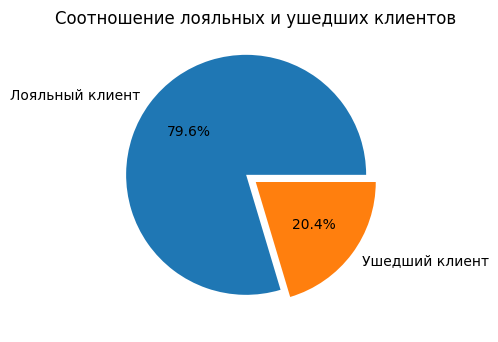

In [4]:
# Считаем количество лояльных и ушедших клиентов, итоги представлены в виде круговой
import matplotlib.pyplot as plt
exited_df = churn_data['Exited'].value_counts()
fig = plt.figure(figsize = (3,3))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    exited_df, 
    labels = ('Лояльный клиент', 'Ушедший клиент'),
    autopct = '%.1f%%',
    explode = [0.1,0] 
    )
axes.set_title('Соотношение лояльных и ушедших клиентов');


Каждый пятый клиент уходит из банка.

Задание 9.2

In [5]:
# Отбираем клиентов с суммой на счет более 2500, показываем распределение пользователей
# в соответствии с суммой на их счету
import plotly
import plotly.express as px
client_data = churn_data[churn_data['Balance']>2500]
fig = px.histogram(
    data_frame = client_data,
    x = 'Balance',
    height = 400,
    width = 700,
    nbins = 25,
    title ='Распределение баланса пользователей с суммой на счету более 2500'
    )
fig.show()

Большая часть клиентов банка имеет на счету от 90000 до 150000. Клиентов, у которых на счетах менее 40000 и более 200000 незначитальное количество.

Задание 9.3

In [6]:
fig = px.histogram(
    data_frame = churn_data,
    x = 'Balance',
    color = 'Exited',
    orientation = 'v',
    height = 600,
    width = 600,
    nbins = 25,
    title = 'Распределение баланса лояльных (0) и ушедших (1) клиентов'
)
fig.show()

Банк имеет больше всего клиентов с остатками на счету до 10000 и от 110000 до 130000. В этих же интервалах остатков находятся больше всего ушедших клиентов. Можно сделать вывод, что размер остатка на счету не влияет на лояльность клиента. 
Количество клиентов с остатком на счету до 10000 в два раза больше, следующей по размеру остатков на счету группы клиентов (110000-130000). Банку необходимо направить усилия для поддержания лояльности этой многичисленной группы клиентов. Стимулировать их хранить на счету большие суммы.
Клиентов с остатками более 200000 незначительное количество. Можно рекомендовать разработать программу лояльности для таких VIP клиентов.

Задание 9.4

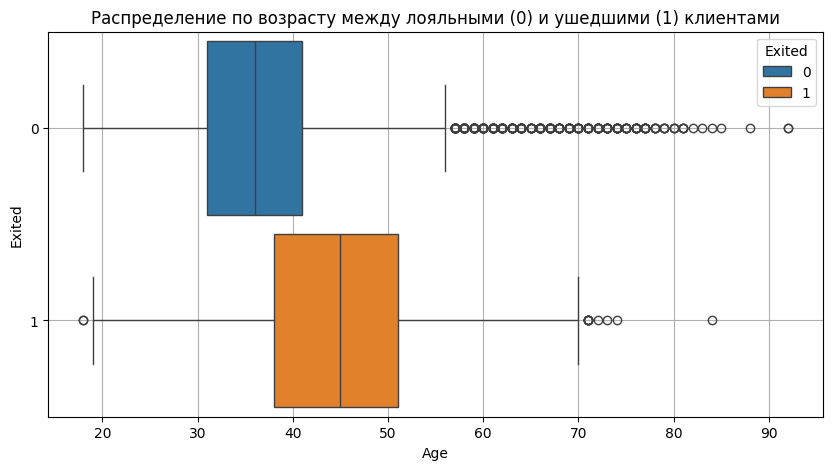

In [7]:
import seaborn as sns
fig = plt.figure (figsize = (10,5))
boxplot = sns.boxplot(
    data = churn_data, 
    y = 'Exited', 
    x = 'Age', 
    hue = 'Exited',
    orient = 'h', 
    width = 0.9
    )
boxplot.set_title ('Распределение по возрасту между лояльными (0) и ушедшими (1) клиентами')
boxplot.grid()

В группе 40-50 лет наибольшее количество ушедших клиентов. Наибольшее группа лояльных клиентов 30-40 лет. Также после 55 лет большое количество выбросов в группе лояльных клиентов. Однако, это может говорить о том, что пожилые клиенты не хотят менять банк и остаются в том, что были. 
Банку нужно обратить внимание на группу 40-50 лет, определить причину ухода клиентов этого возраста и разработать пути решения этой проблемы.

Задание 9.5

Text(0, 0.5, 'Кредитный рейтинг')

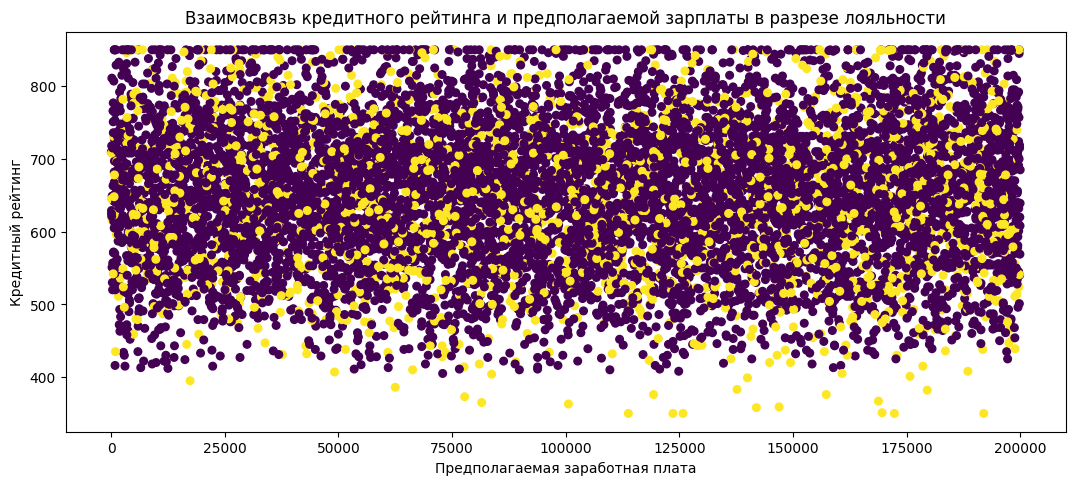

In [8]:
fig = plt.figure(figsize = (10,4))
axes = fig.add_axes([0,0,1,1])
axes.scatter(
    x = churn_data['EstimatedSalary'],
    y = churn_data ['CreditScore'],
    s = 30,
    marker = 'o',
    c = churn_data ['Exited']
)
axes.set_title ('Взаимосвязь кредитного рейтинга и предполагаемой зарплаты в разрезе лояльности')
axes.set_xlabel ('Предполагаемая заработная плата')
axes.set_ylabel ('Кредитный рейтинг')

На графике не прослеживается никаких закономерностей. Клиент как с высокой, так и с низкой заработной платой может иметь как низкий так и высокий кредитный рейтинг. Зависимости от лояльности клиентов также не прослеживается.

Задание 9.6

In [9]:
# Группируем клиентов по полу и расчитываем долю ушедших клиентов
gender_data = churn_data.groupby('Gender')['Exited'].mean()
print(gender_data)
fig = px.bar (
    data_frame = gender_data,
    x = gender_data.index,
    y = 'Exited',
    color = gender_data.index,
    orientation = 'v',
    height = 500,
    width = 500,
    title = 'Соотношение полов среди ушедших клиентов'
)
fig.show()

Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64


Женщины перестают быть клиентами банка чаще, чем мужчины (доля мужчин на одну треть меньше, чем доля женщин).

Задание 9.7

In [10]:
# Добавляем новый признак - Лояльность клиентов
# Группируем клиентов по количеству продуктов, которые они используют
# Вычисляем сумму для каждой группы лояльных и ушедших клиентов
churn_data['Loyal'] = 1 - churn_data['Exited']
groupped_products = churn_data.groupby(['NumOfProducts'])[['Exited','Loyal']].sum()
fig = px.bar(
    data_frame = groupped_products,
    x = groupped_products.index,
    y = ['Exited','Loyal'],
    orientation = 'v',
    height = 500,
    width = 700,
    title = 'Зависимость оттока клиентов от числа приобретенных услуг'
)
fig.show()

Больше всего ушедших клиентов в количественном выражении пользовалось только одной услугой.
В процентном соотношении, наибольший процент ушедших клиентов пользовались 3 или 4 услугами.
Клиенты с 4 услугами ушли все.
Количество ушедших клиентов в количественном выражении снижается при увеличении количества услуг.

Задание 9.8

In [11]:
# Группируем клиентов по статусу и вычисялем сумму лояльных и ушедших клиентов по каждому статусу
status_group = churn_data.groupby(['IsActiveMember'])[['Exited','Loyal']].sum()
fig = px.bar(
    data_frame = status_group,
    x  = status_group.index,
    y = ['Exited','Loyal'],
    orientation = 'v',
    height = 500,
    width = 500,
    title = 'Зависимость оттока клиентов от статуса'    
)
fig.show()

Клиенты с неактивным статусом уходят почти в два раза чаще, чем с активным. Соответственно можно порекомендовать банку предпринимать меры для того, чтобы клиенты не переходили в статус неактивных и пользовались счетами.

Задание 9.9

In [12]:
# Группируем клиентов по странам и вычисялем долю ушедших клиентов для каждой страны
country_group = churn_data.groupby('Geography')['Exited'].mean()
fig = px.choropleth(
    data_frame = country_group,
    locations = country_group.index,
    locationmode = 'country names',
    color = 'Exited',
    title = 'Доля ушедших клиентов по странам',
    height = 500,
    width = 800,
    color_continuous_scale='Oranges'
)
fig.show()

В Германии 32 % процента ушедших клиентов, т.е почти каждый третий. В Испании и Франции около 16% ушедших клиентов, что в два раза ниже, чем в Германии. Отделениям в Германии нужно пересмотреть систему работы с клиентами.

Задание 9.10

Text(0.5, 1.0, 'Тепловая карта ушедших клиентов по категориям')

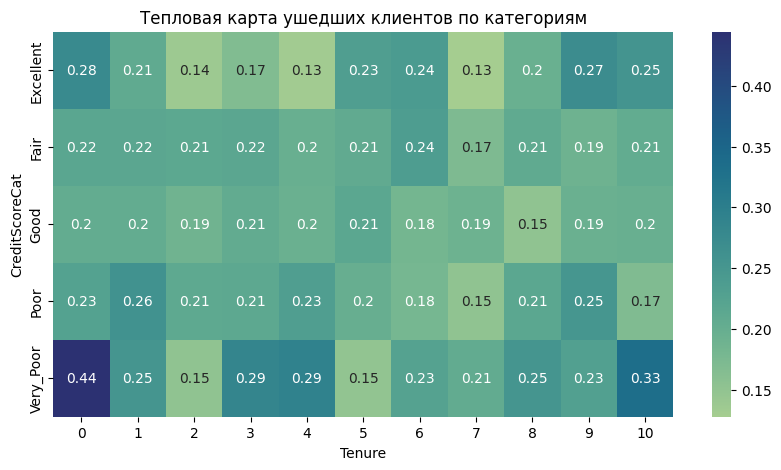

In [13]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data ['CreditScoreCat'] = churn_data ['CreditScore'].apply (get_credit_score_cat)
churn_data_pivot = churn_data.pivot_table(
    values = 'Exited',
    index = 'CreditScoreCat',
    columns = 'Tenure',
    fill_value = 0
    )
fig = plt.figure(figsize = (10,5))
heatmap = sns.heatmap(
    data = churn_data_pivot, 
    cmap='crest',
    annot=True
    )
heatmap.set_title('Тепловая карта ушедших клиентов по категориям')

Чаще всего уходят клиенты с категорией кредитного рейтинга Very_Poor и пользующиеся услугами банка менее одного года. 
Клиенты категории Very_Poor,которые являются клиентами банка больше одного года, чаще уходят, чем клиенты других категорий кредитного рейтинга.
Также больше других категорий уходят клиенты со статусом Excellent, пользующиеся услугами банка 1, 5, 6, 9 и 10 лет.
